In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
from sklearn import datasets, linear_model
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
%matplotlib inline
import seaborn as sns; sns.set()
import operator

import warnings
warnings.filterwarnings('ignore')

def prep (a):
    return a.reshape(a.shape[0], 1)
def unprep (a):
    return np.squeeze(a)

ERROR: No traceback has been produced, nothing to debug.


In [2]:
#df = pandas.read_csv('/Users/david/notebooks/data/futs1.csv', usecols=[0:2], engine='python', skipfooter=3)
df = pd.read_csv('/Users/david/notebooks/data/futs1.csv', header=3)
df = df.drop(df.columns[3:], axis=1) 
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df2 = df.copy()
df2["CHG"] = df2["OPEN"] - df2["OPEN"].shift(1)
df2["PREVVOLUME"] = df2["VOLUME"].shift(1)
df2 = df2.dropna()
#df.loc[3:]
#df.head()
print(df.head())
print(df2.dtypes)
%debug

                 Date        OPEN  VOLUME
0 2016-09-01 09:00:00  130.671875     871
1 2016-09-01 09:01:00  130.656250      14
2 2016-09-01 09:02:00  130.656250     103
3 2016-09-01 09:03:00  130.656250     395
4 2016-09-01 09:04:00  130.656250     186
Date          datetime64[ns]
OPEN                 float64
VOLUME                 int64
CHG                  float64
PREVVOLUME           float64
dtype: object


ERROR: No traceback has been produced, nothing to debug.


In [31]:
#mask = (df2['Date'] > "20160901 09:00:00") & (df['Date'] <= "20160901 10:00:00")
#mask = (df2['Date'] > "20160901") & (df['Date'] <= "20171001")
#dft1 = df2.loc[mask]
#dft1_pos = dft1[dft1["CHG"] < 0.0]
#dft1_pos = dft1_pos.sort_values("PREVVOLUME")
#chg_pos = dft1_pos["OPEN"].values
#prevvol_pos = dft1_pos["PREVVOLUME"].values
size = 500
X = prep(df2["OPEN"].values[0:size])
y = prep(df2["OPEN"].shift(-1).values[0:size])
#print(X, y)

In [32]:
train_size = 400
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

In [40]:
def calc_e (x, y):
    #Predictor comparison
    res = x - y
    res_e = np.sqrt(np.mean(res**2))
    #print(res_e)
    return res_e, res

In err:  0.0312781050047
Out err:  0.207316337377
Simple err:  0.0169134196018


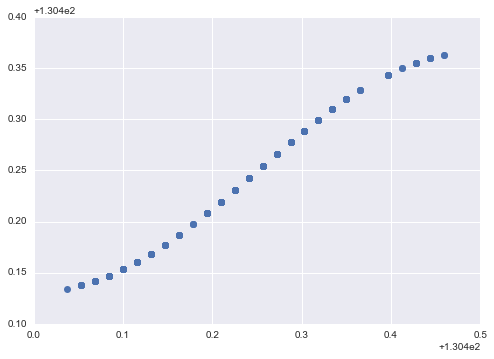

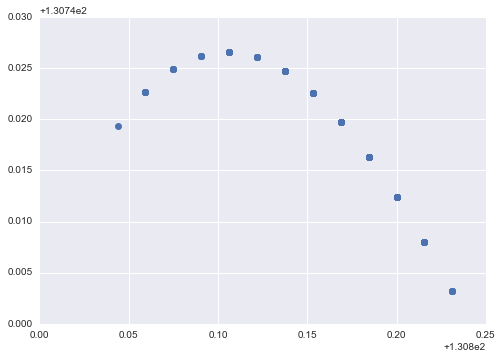

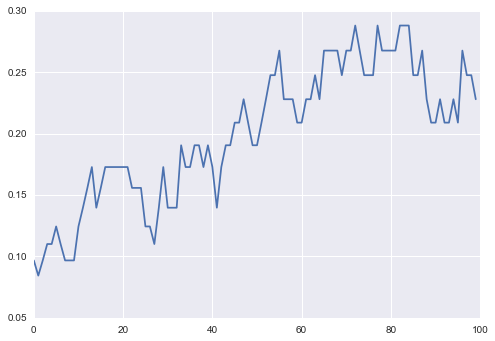

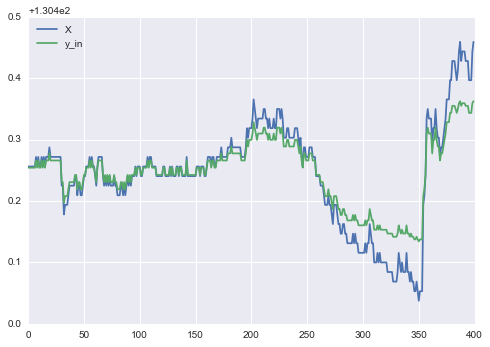

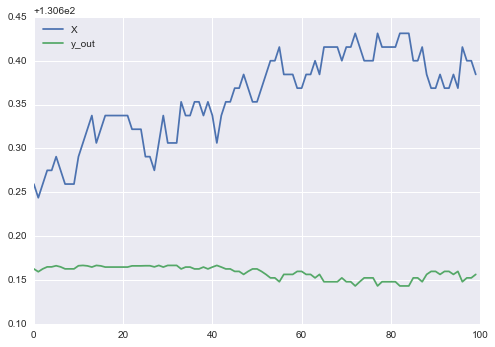

In [46]:
for start 

svr.fit(X[:train_size], y[:train_size])
y_in = svr.predict(X[:train_size])
y_out = svr.predict(X[train_size:])
res_e_simple, res_simple = calc_e(unprep(X[train_size:-1]), unprep(X[train_size+1:]))
res_e_in, res_in = calc_e(unprep(X[:train_size]), y_in)
res_e, res = calc_e(unprep(X[train_size:]), y_out)
print("In err: ", res_e_in)
print("Out err: ", res_e)
print("Simple err: ", res_e_simple)
#print(unprep(X[train_size:]))
plt.plot(unprep(X[:train_size]), y_in, 'o')
plt.figure()
plt.plot(unprep(X[train_size:]), y_out, 'o')
plt.figure()
plt.plot(res)
plt.figure()
plt.plot(unprep(X[:train_size]), label ="X")
plt.plot(y_in, label ="y_in")
plt.legend(loc="best")
plt.figure()
plt.plot(unprep(X[train_size:]), label ="X")
plt.plot(y_out, label ="y_out")
plt.legend(loc="best")

In [133]:
def sub_p (x1, y1, x2, y2, do_plot=False):
    svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                       param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                        "gamma": np.logspace(-2, 2, 5)})
    svr.fit(x1, y1)
    y1_svr = svr.predict(x1)
    y2_svr = svr.predict(x2)
    
    #res_e_simple, res_simple = calc_e(unprep(X[train_size:-1]), unprep(X[train_size+1:]))
    res_e_in, res_in = calc_e(y1, y1_svr)
    res_e, res = calc_e(y2, y2_svr)
    #print("In err: ", res_e_in)
    #print("Out err: ", res_e)
    #print("Simple err: ", res_e_simple)
    #print(unprep(X[train_size:]))
    if do_plot:
        #plt.plot(unprep(x1), y1_svr, 'o')
        #plt.figure()
        #plt.plot(unprep(x2), y2_svr, 'o')
        #plt.figure()
        plt.plot(res)
        plt.figure()
        plt.plot(unprep(X[:train_size]), label ="X")
        plt.plot(y_in, label ="y_in")
        plt.legend(loc="best")
        plt.figure()
        plt.plot(unprep(X[train_size:]), label ="X")
        plt.plot(y_out, label ="y_out")
        plt.legend(loc="best")
    return res_e_in, res_e, svr

In [51]:
def dumb_p (x1, y1):
    res_e_simple, res_simple = calc_e(unprep(x1), unprep(y1))
    return res_e_simple, res_simple

In [279]:
size = 500
#w1 = prep(df2["OPEN"].shift(0).values[0:size])
fnum = 10
X = np.transpose([df2["OPEN"].shift(i).values[fnum:size+fnum]  for i in range(fnum)])
y = prep(df2["OPEN"].shift(-1).values[fnum:size+fnum])
print(np.shape(X), np.shape(y))
#print(X[4])
#print(X)
#print(y)
#print(np.shape(np.transpose(X)))
#y = prep(df2["OPEN"].shift(-1).values[0:size])
#print(np.shape(d))
#for i in range(np.shape(d)[0]):
#    plt.plot(d[i])
#    print(d[i])

(500, 10) (500, 1)


In [250]:
def prob_move(p, start, end):
    d = dict()
    x1 = p[start:end,:1]
    #print(x1)
    for i in range(0, end-start):
        #just the simple ts
        c1 = x1[i-1] - x1[i]
        if c1[0] not in d:
            d[c1[0]] = 0
        d[c1[0]] +=1
    s = sum(d.values())
    for k in d.keys():
        d[k] = d[k]/s
    #print(d)
    #print(sum(d.values()))
    r = sumproduct(d.keys(), d.values())
    return r, d

In [190]:
def sumproduct(A, B):
    return sum([i*j for i,j in zip(A,B)])

In [246]:
def maxkey(stats):
    return max(stats, key=lambda key: stats[key])

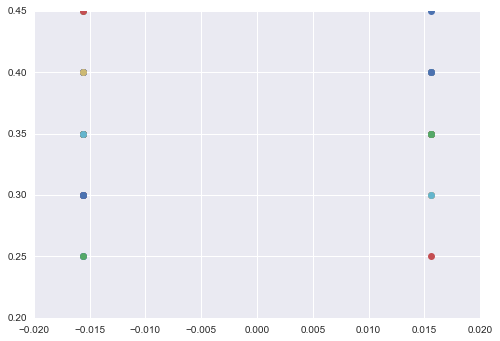

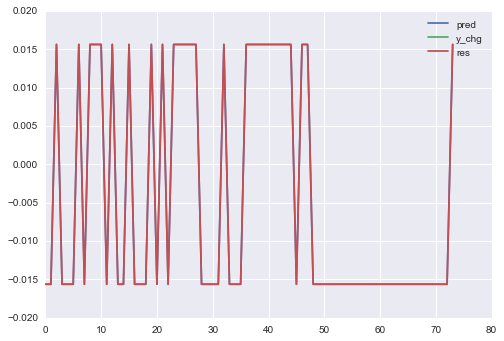

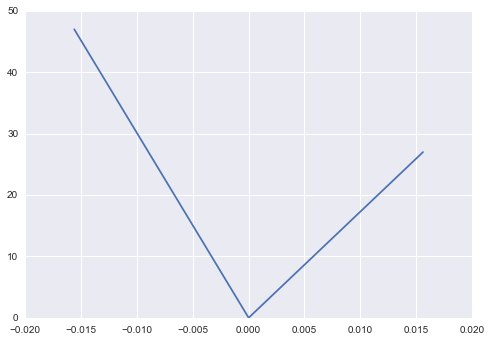

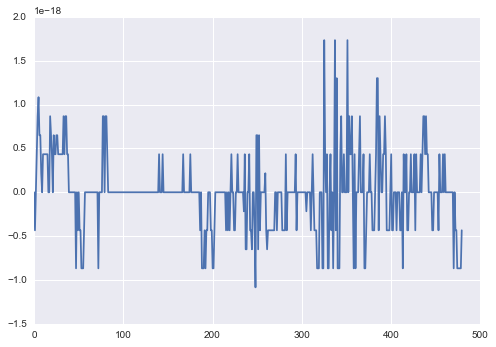

In [287]:
step = 1
train_len = 20
test_len = step

start_train = 0
end_train = start_train + train_len
e_out_ar = []
e_in_ar =[]
s3_ar = []
s4_ar = []
b1_ar = []
f_dict = dict()
pred = []
act = []
while end_train < len(X):
    end_train = np.min([start_train + train_len, len(X)])
    end_test = end_train + test_len
    l1 = len(X) - end_train
    if l1 ==0:
        break
    #x1 = p[start:end,:1]
    act.append(y_chg)
    #print (start_train, end_train)
    b, b_dict = prob_move(X, start_train, end_train)
    b1_ar.append(b)
    #z1 = b_dict[0]
    z2 = maxkey(b_dict)
    if z2 not in f_dict.keys():
        f_dict[z2] = 0
    #print(z2, z1)
    if z2 != 0:
        sorted_x = sorted(b_dict.items(), key=operator.itemgetter(0))
        s_x = [elem[0] for elem in sorted_x]
        s_y = [elem[1] for elem in sorted_x]
        #print(z2, b_dict[z2])
        #plt.plot(s_x, s_y)
        plt.plot(z2, b_dict[z2], 'o')
        f_dict[z2]+=1
        y_chg = y[end_train] - y[end_train-1] 
        pred.append(z2)
        
    #print(e_in, e_out)
    start_train += step
plt.figure()
#print(pred, y)
res = pred - y_chg
plt.plot(pred, label='pred')
plt.plot(y_chg, label ='y_chg')
plt.plot(res, label='res')
plt.legend()
plt.figure()
fs_x = sorted(f_dict.items(), key=operator.itemgetter(0))
f_x = [elem[0] for elem in fs_x]
f_y = [elem[1] for elem in fs_x]
plt.plot(f_x, f_y)
plt.figure()
plt.plot(b1_ar)

100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 

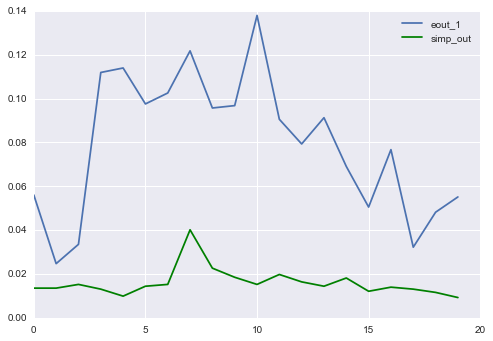

In [189]:
step = 20
train_len = 100
test_len = step

#last val as pred for next val
s1, res_s = dumb_p(X[:train_len, 0], y[:train_len])
s2, res_s = dumb_p(X[train_len:, 0], y[train_len:])

#f = 1
start_train = 0
end_train = start_train + train_len
e_out_ar = []
e_in_ar =[]
s3_ar = []
s4_ar = []
b1_ar = []
while end_train < len(X):
    end_train = np.min([start_train + train_len, len(X)])
    end_test = end_train + test_len
    l1 = len(X) - end_train
    if l1 ==0:
        break
    #print(l1)
    #do stuff
    for f in [1]:

        e_in, e_out, svr = sub_p(X[start_train:end_train,:f], y[start_train:end_train], 
                            X[end_train:end_test,:f], y[end_train:end_test])
        e_in_ar.append(e_in)
        e_out_ar.append(e_out)
    s3, res_s = dumb_p(X[start_train:end_train, 0], y[start_train:end_train])
    s4, res_s = dumb_p(X[end_train:end_test, 0], y[end_train:end_test])
    s3_ar.append(s3)
    s4_ar.append(s4)
    
    b_dict = prob_move(X, start_train, end_train)
    print (end_train, end=", ")
    #print(e_in, e_out)
    start_train += step
plt.plot(e_out_ar, label='eout_'+str(f))


plt.plot(s4_ar, label="simp_out", color = 'g')
plt.legend(loc='best')

#plt.figure()
#plt.plot(e_in_ar, label="ein")
#plt.plot(s3_ar, label="simp_in", color = 'g')
#plt.legend(loc='best')


In [159]:
print(e_out_ar)

[0.016010860571811874, 0.022097086912079612, 0.02153757617514097, 0.043075152350281941, 0.058983081525552733, 0.032021721143623748, 0.018814991529362963, 0.072112379745089536, 0.12238475127134917, 0.099322743703759181, 0.098677533911970927, 0.091474413601570631, 0.13588936907817109, 0.092247312191519215, 0.080034050769768911, 0.14546232240520646, 0.07955749425430042, 0.095496027671398587, 0.082419061618992193, 0.056618230524133333]


In [161]:
print(e_out_ar)


[0.016010860571811874, 0.022097086912079612, 0.02153757617514097, 0.043075152350281941, 0.058983081525552733, 0.032021721143623748, 0.018814991529362963, 0.072112379745089536, 0.12238475127134917, 0.10470338730239161, 0.099498563264616341, 0.091246700479601095, 0.13322477346629166, 0.1698551328014794, 0.094431909992274951, 0.12436572731234694, 0.087560600786261114, 0.087548722011419611, 0.084366773463045053, 0.057965044797245215]
